# **Project Teamwork Activity: Project Set up & Data Exploration**

## **Instructions**

Create a Saturn workspace in Ed STEM and complete the following:

1. Add your teammates and student leader to the workspace. ✅
2. Import your selected dataset into your notebook ✅
3. Explore your data using functions to determine the number of rows, number of columns, data types in the columns and names of a few columns. ✅
4. Create at least 3 data visualizations to help you understand your dataset. ✅
5. Discussion in the your project notebook (add a text cell and answer the following questions): ✅
    * Describe your dataset. How many rows are there? What are the names of some interesting columns? Which data type are the columns?
    * What are a few predictions you would like to investigate?
    * What do your initial data visualizations tell you about your data?
    * What inconsistencies do you notice in your data? What are other columns (“features”) you would like to add to your data?

## **Import Packages**

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from random import *

## **Load the Dataset**

In [98]:
df = pd.read_csv("graduation_rate.csv")
df.head()

## **Determine Number of Rows**

In [99]:
print("The number of rows: ", len(df))

## **Determine Number of Columns**

In [100]:
print("The number of columns: ", len(df.columns))

## **Determine Data Types in the Columns**

In [101]:
df.dtypes

## **Determine Names of a Few Columns**

In [102]:
df.columns

In [103]:
df.columns.tolist()

## **Create 3 Data Visualizations**

In [104]:
df.plot.scatter(x='parental income', y='years to graduate', title='Graduation Rate Dataset')

In [105]:
df.plot.scatter(x='parental income', y='college gpa', title='Graduation Rate Dataset')

In [106]:
df.plot.scatter(x='parental income', y='parental level of education', title='Graduation Rate Dataset')

## **Discussion**

1. Describe your dataset. How many rows are there? What are the names of some interesting columns? Which data type are the columns?
2. What are a few predictions you would like to investigate?
3. What do your initial data visualizations tell you about your data?
4. What inconsistencies do you notice in your data? What are other columns (“features”) you would like to add to your data?

### Answers:
* The dataset consists of 1000 rows, and the names of some interesting columns are parental income, college gpa, and years to graduate. The data type of the columns consist of int, float and object.
* Some predictions that I would live to investigate are taking into account parents education in the success of students in college.
* The initial data visualization tell me there is correlation between certain columns.
* The inconsistencies that I notice in my data is trying to perform some functions in the data. There will have to be renaming of column names since the space in the column names cause errors.






---



# **Project Teamwork Activity: Data Preparation**

## **Instructions**

Review the Data Preparation Resources and the materials shared in the workshops and then attempt the following:

* Address missing values in your data ✅
* Address any inconsistencies in your data ✅
* Transform your data: scaling and/or aggregation ✅

Discussion to be added to your notebook:

- Summarize the data preparation techniques and steps your team applied to your data
- What additional work does your team need to do in order to fully prepare your data?

## **Missing Values**

In [107]:
print("Missing values:", df.isnull().values.any())

## **Inconsistencies**

In [108]:
df.columns = df.columns.str.replace(' ','_')
df.columns = ['ACTscore', 'SATscore', 'ParentLvlEducation', 'ParentIncome', 'HSGPA', 'CollegeGPA', 'YearsToGraduate']
df.head()
#some high school = 1
#high school = 2
#some college = 3
#associate's degree = 4
#bachelor's degree = 5
#master's degree = 6

df.columns.unique()

## **Transform Data**

In [109]:
df['ParentLvlEducation'] = df['ParentLvlEducation'].replace(['some high school'], 1)
df['ParentLvlEducation'] = df['ParentLvlEducation'].replace(['high school'], 2)
df['ParentLvlEducation'] = df['ParentLvlEducation'].replace(['some college'], 3)
df['ParentLvlEducation'] = df['ParentLvlEducation'].replace(['associate\'s degree'], 4)
df['ParentLvlEducation'] = df['ParentLvlEducation'].replace(['bachelor\'s degree'], 5)
df['ParentLvlEducation'] = df['ParentLvlEducation'].replace(['master\'s degree'], 6)
df['ParentLvlEducation'].unique()

### **Aggregation**

In [110]:
df.agg(['max', 'min'])

## **Discussion**

1. Summarize the data preparation techniques and steps your team applied to your data
2. What additional work does your team need to do in order to fully prepare your data?

### Answers:

* The data preparation techniques that we applied were changing inconsistencies in the names of the columns, and changing the data of the column Parent Level of Education to numbers.
* The additional work that needs to be done is possibly adding more columns to represent certain groupings. 



---



# **Project Teamwork Activity: Data Visualization**

Continue working in your workspace. Update your Saturn notebook to show at least one data visualization. Your team will share one data visualization during your biweekly student leader meeting and get feedback. During this meeting your peers will be asked the following questions about your data visualization:

* What do you think the creator thought was important or the takeaway should be? 
* What caught your attention / what did you learn from the viz? 
* What visualizations attributes seemed effective to you for revealing the key message and why? 
* What visual attributes didn’t seem to work well and why?

**Discussion in the your project notebook:**

* Describe the data in words?
* What is important to you about this dataset? What do you want the reader to take-away from looking at this visualization?
* What visualization decisions did you make that are driven by the takeaway message? (scale, colors, mark type, text, lines to show thresholds, annotations, how data was grouped, etc)
* Data is never "pure"; it always comes from somewhere. Is there anything you think is important to note about what might not have been captured in the dataset?

## **Bar Chart**

In [111]:
df['ParentLvlEducation'].value_counts().sort_index().plot(kind='bar', stacked=True, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow'])

## **Line Chart**

In [112]:
df.info()
bins = [0,20000,40000,60000,80000,100000,130000]
labels = ['0-20k','20k-40k','40k-60k','60k-80k','80k-100k','100k-130k']
df['IncomeCategory'] = pd.cut(df['ParentIncome'],bins,labels = labels)

bins2 = [2.5,3,3.5,4]
labels2 = ['2.5-3','3-3.5','3.5-4']
df['GPAHSCategory'] = pd.cut(df['HSGPA'],bins2,labels = labels2)

bins3 = [2.5,3,3.5,4]
labels3 = ['2.5-3','3-3.5','3.5-4']
df['GPACollegeCategory'] = pd.cut(df['CollegeGPA'],bins3,labels = labels3)
df.head(25)

## **Scatter Plot**

In [113]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(df['ParentIncome'], df['CollegeGPA'])
# set a title and labels
ax.set_title('Dataset')
ax.set_xlabel('ParentIncome')
ax.set_ylabel('CollegeGPA')

In [114]:
fig, ax = plt.subplots()

for i in range (len(df['ParentLvlEducation'])):
    ax.scatter(df['ParentLvlEducation'][i], df['YearsToGraduate'][i])
ax.set_title('Parent Level of Ed VS Years to Graduate')
ax.set_xlabel('Parent Level of Ed')
ax.set_ylabel('Years to Graduate')


## **Bubble Chart**

In [115]:
import seaborn as sns 
sns.set_context("talk", font_scale=1.1)
plt.figure(figsize=(10,6))
sns.scatterplot(x = "CollegeGPA",
                y = "YearsToGraduate",
                size = "ParentIncome",
                sizes=(20, 500),
                alpha =0.5,
                hue="ParentIncome",
                data = df)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0, title="ParentIncome")
plt.xlabel("CollegeGPA")
plt.ylabel("YearsToGraduate")
plt.tight_layout()
plt.savefig("Bubble_plot_Seaborn_scatterplot.png",
                    format = 'png', dpi =150)

## **Discussion:**

1. Describe the data in words?
2. What is important to you about this dataset? What do you want the reader to take-away from looking at this visualization?
3. What visualization decisions did you make that are driven by the takeaway message? (scale, colors, mark type, text, lines to show thresholds, annotations, how data was grouped, etc)
4. Data is never "pure"; it always comes from somewhere. Is there anything you think is important to note about what might not have been captured in the dataset?

### Answers:

* The data is



---



# **Project Teamwork Activity: Implementation, Testing & Training**

**Discussion to be added to your notebook:**

* How are you evaluating the performance of your implementation?
* What is your reasoning for taking this approach?

# **Attempted Testing/Traing a Model Pt.1**

Notes: 
* When we train a model we want to only train 80% to use the 20% to test the model in order to see if the model is accurate.
* Independent Var: College GPA & Years to Graduate
* Dependent Var: Parent Income

In [532]:
df.head()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

**College GPA Vs Parent Income**

In [28]:
plt.scatter(df['CollegeGPA'], df['ParentIncome'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ACTscore            1000 non-null   int64   
 1   SATscore            1000 non-null   int64   
 2   ParentLvlEducation  1000 non-null   int64   
 3   ParentIncome        1000 non-null   int64   
 4   HSGPA               1000 non-null   float64 
 5   CollegeGPA          1000 non-null   float64 
 6   YearsToGraduate     1000 non-null   int64   
 7   IncomeCategory      1000 non-null   category
 8   GPAHSCategory       1000 non-null   category
 9   GPACollegeCategory  1000 non-null   category
dtypes: category(3), float64(2), int64(5)
memory usage: 58.2 KB


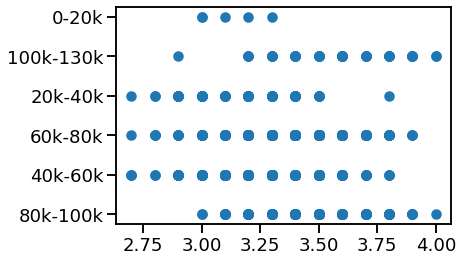

In [117]:
df.info()
plt.scatter(df['CollegeGPA'], df['IncomeCategory'])

**Years To Graduate Vs Parent Income**

In [95]:
plt.scatter(df['YearsToGraduate'], df['ParentIncome'])

In [96]:
x = df[['CollegeGPA']] #x = df[['CollegeGPA', 'YearsToGraduate']]
y = df['ParentIncome']

In [451]:
x #Columns: College Gpa and Years to Graduate

In [452]:
y #Column: Parent Income

In [437]:
from sklearn.model_selection import train_test_split

In [453]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #test_size determines data set size for training and testing

In [439]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [454]:
x_train #Randomly chosen 80% of the data set to train

In [441]:
len(x_train) #80% of the dataset

In [442]:
len(x_test) #20% of the dataset

In [455]:
from sklearn.linear_model import LinearRegression #Linear Regression Model
linReg = LinearRegression() #clf: Object of this Class

In [456]:
linReg.fit(x_train, y_train) #Trains the model

In [468]:
y_pred = linReg.predict(x_test) #Predicts values similar to data set

In [467]:
np.mean((y_test - y_pred)**2) #mean squared error, lesser/closer to 0 improves model

In [466]:
from sklearn.metrics import mean_squared_error

In [465]:
mean_squared_error(y_test, y_pred)

In [464]:
linReg.score(x_test, y_test) #checks accuracy of the model: Accuracy is about 23%



---



## **Hessah Linear Regression Model**

In [62]:
x_data = df[['ParentLvlEducation', 'ParentIncome']];
y_data = df['CollegeGPA'];

from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data, y_data)

In [407]:
from sklearn.linear_model import LinearRegression
LRModel = LinearRegression()
LRModel.fit(x_train2, y_train2)
pd.DataFrame(LRModel.coef_, x_data.columns, columns = ['Coeff'])

In [335]:
predictions = LRModel.predict(x_test2)
plt.scatter(y_test2, predictions)
m, b = np.polyfit(y_test2, predictions, 1)
plt.plot(y_test2, m*y_test2+b)

In [337]:
from sklearn import metrics
metrics.mean_absolute_error(y_test2, predictions)

In [339]:
metrics.mean_squared_error(y_test2, predictions)

In [340]:
np.sqrt(metrics.mean_squared_error(y_test2, predictions))

In [344]:
LRModel.score(x_test2, y_test2) 